In [1]:
import torch

torch.__version__

'2.9.0+cpu'

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data", path="loan_data.csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-approval-classification-data' dataset.
Path to dataset files: /kaggle/input/loan-approval-classification-data/loan_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the data

df = pd.read_csv(path)

df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
# check for missing values

df.isna().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [6]:
# check for duplicates

df.duplicated().sum()

np.int64(0)

# EDA

In [7]:
# dtypes of columns

df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [8]:
# separate the numerical and categorical data

numerical_data = df.select_dtypes(include=np.number)

categorical_data = df.select_dtypes(exclude=np.number)

In [9]:
numerical_data

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,1
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,1
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,1
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1


In [10]:
# statistical summary for numerical data

numerical_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [11]:
categorical_data.describe()

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [12]:
# numerical columns in data

num_cols = numerical_data.columns[0:-1].tolist()

num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [13]:
from matplotlib.gridspec import GridSpec

In [14]:
def plots_for_num_cols(numerical_col):
    plt.figure(figsize=(12,4))
    grid = GridSpec(nrows=1, ncols=4)

    # set the axes
    # boxplot
    ax1 = plt.subplot(grid[:,0])
    # histogram
    ax2 = plt.subplot(grid[:,1:3])
    # violin plot
    ax3 = plt.subplot(grid[:,3])

    # create boxplot
    sns.boxplot(data=df, y=numerical_col,ax=ax1)
    # create histogram
    sns.histplot(data=df,x=numerical_col,ax=ax2)
    # create violin plot
    sns.violinplot(data=df,y=numerical_col,ax=ax3)
    plt.tight_layout()
    plt.show()


PERSON_AGE


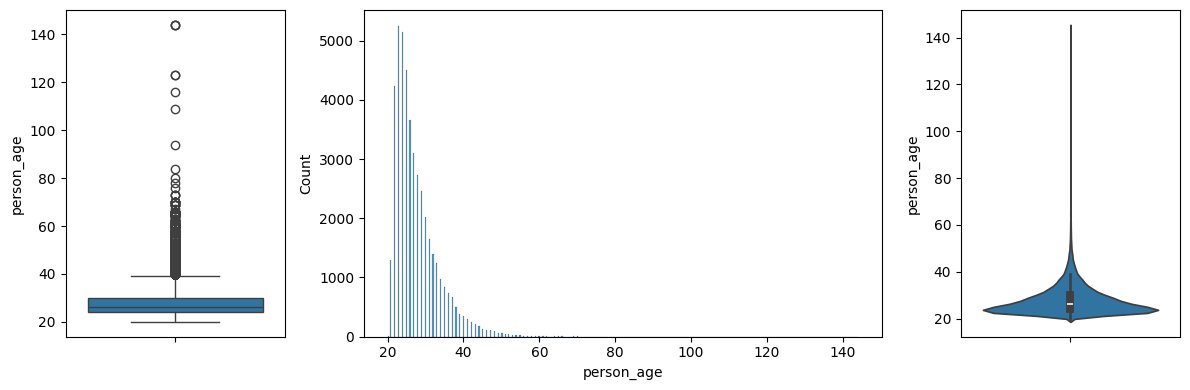


PERSON_INCOME


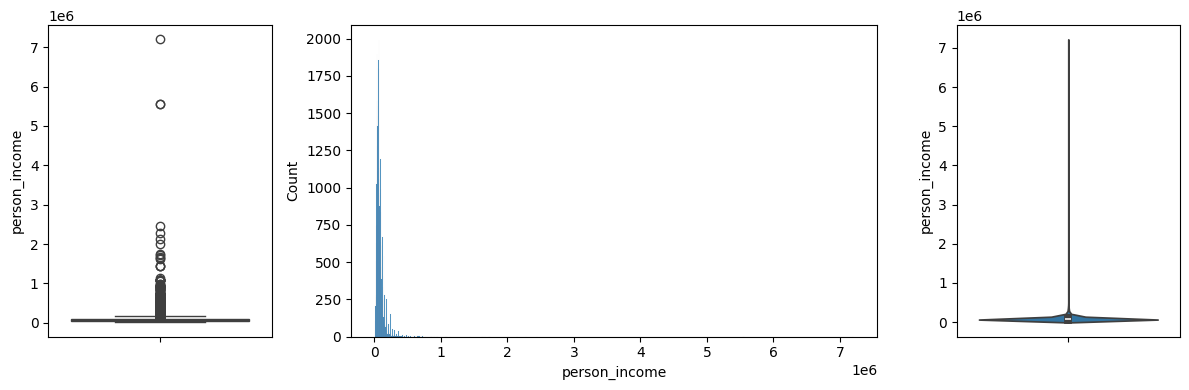


PERSON_EMP_EXP


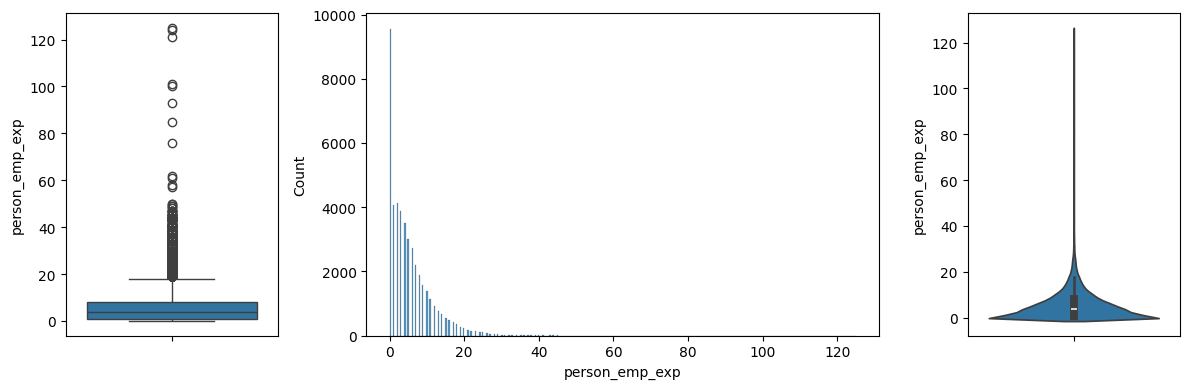


LOAN_AMNT


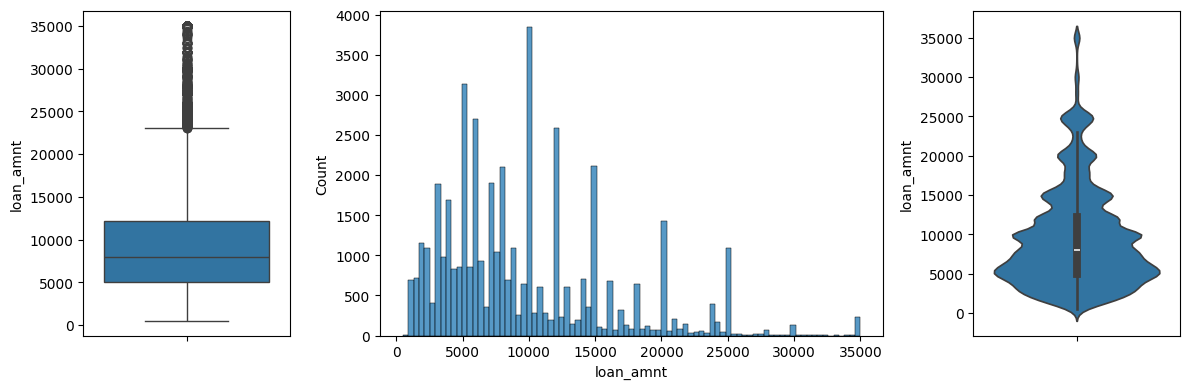


LOAN_INT_RATE


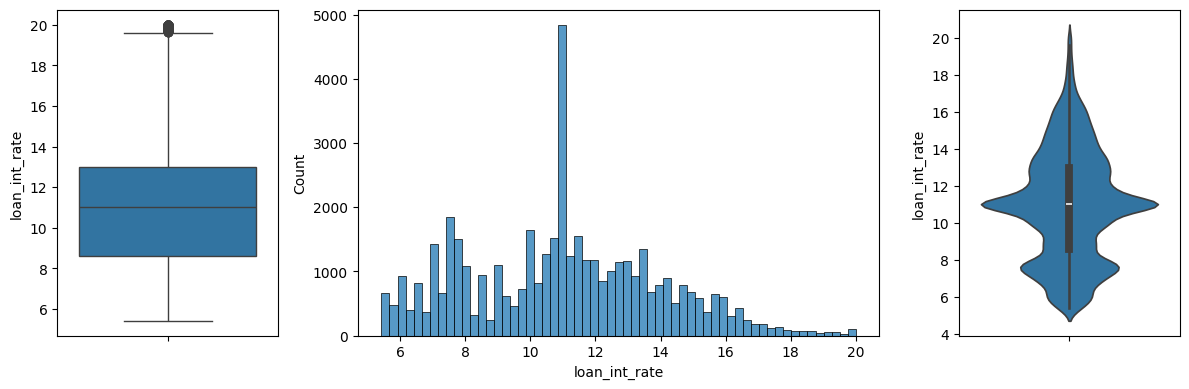


LOAN_PERCENT_INCOME


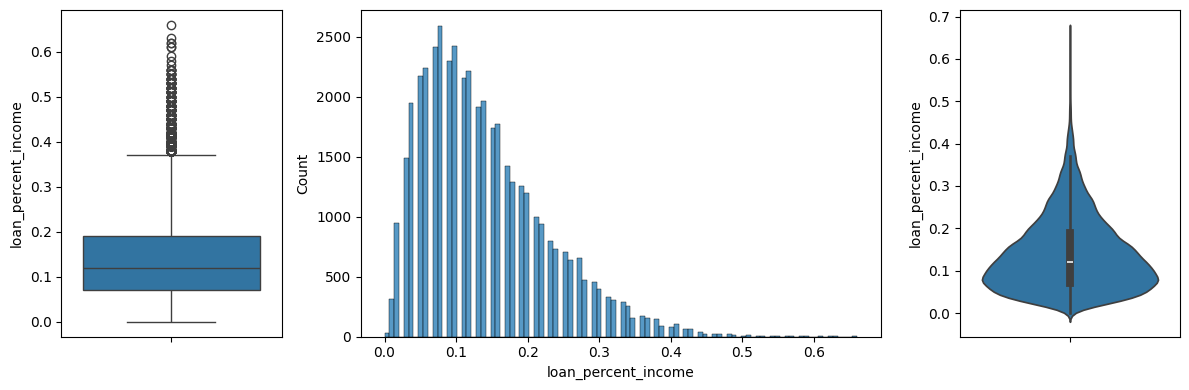


CB_PERSON_CRED_HIST_LENGTH


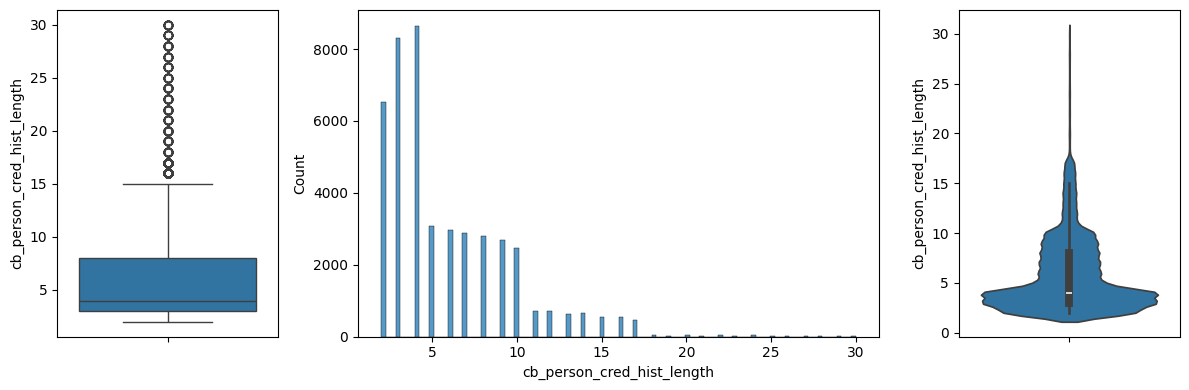


CREDIT_SCORE


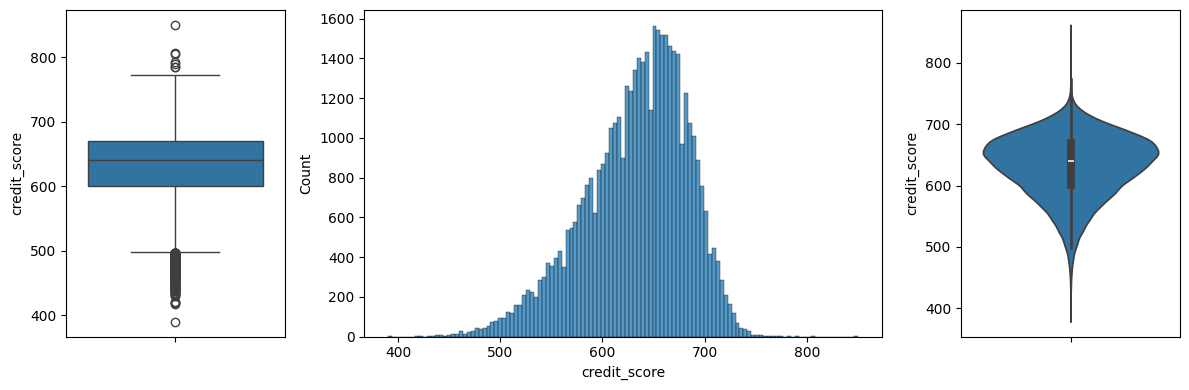

In [15]:
for col in num_cols:
    print(f"{col.upper()}")
    plots_for_num_cols(col)
    print()

In [16]:
def plots_for_cat_cols(column_name):
    print(f"Number of unique values in {column_name}: {df[column_name].nunique()}", end="\n\n")
    print(f"Unique values in {column_name}: {df[column_name].unique()}", end="\n\n")
    display(df[column_name].value_counts(normalize=True))
    sns.countplot(data=df, x=column_name)
    plt.xticks(rotation=45)
    plt.show()

In [17]:
numerical_data.columns[[-1]].tolist()

['loan_status']

In [18]:
cat_cols = categorical_data.columns.tolist() + numerical_data.columns[[-1]].tolist()

cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file',
 'loan_status']

Number of unique values in person_gender: 2

Unique values in person_gender: ['female' 'male']



,proportion
person_gender,
male,0.552022
female,0.447978


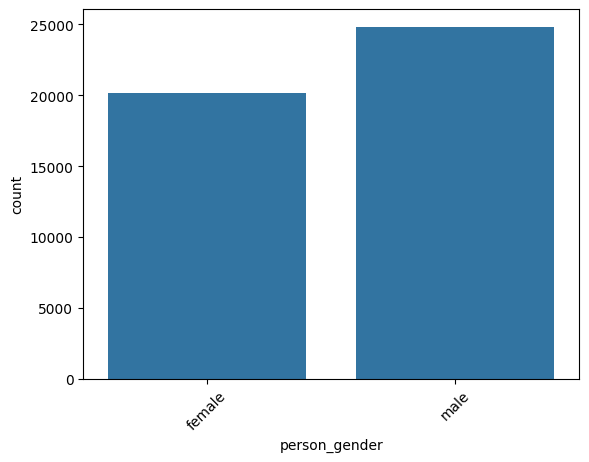

Number of unique values in person_education: 5

Unique values in person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']



,proportion
person_education,
Bachelor,0.297756
Associate,0.267289
High School,0.266044
Master,0.155111
Doctorate,0.013800


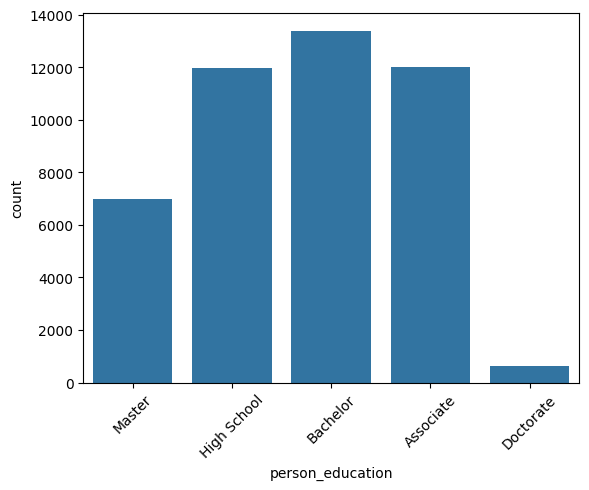

Number of unique values in person_home_ownership: 4

Unique values in person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']



,proportion
person_home_ownership,
RENT,0.520956
MORTGAGE,0.410867
OWN,0.065578
OTHER,0.002600


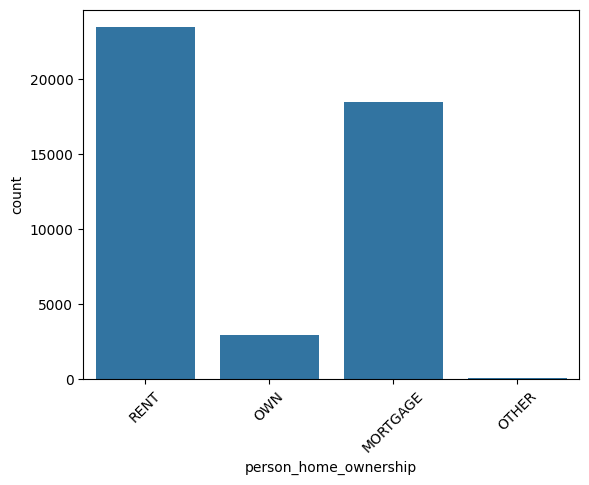

Number of unique values in loan_intent: 6

Unique values in loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']



,proportion
loan_intent,
EDUCATION,0.203400
MEDICAL,0.189956
VENTURE,0.173756
PERSONAL,0.167822
DEBTCONSOLIDATION,0.158778
HOMEIMPROVEMENT,0.106289


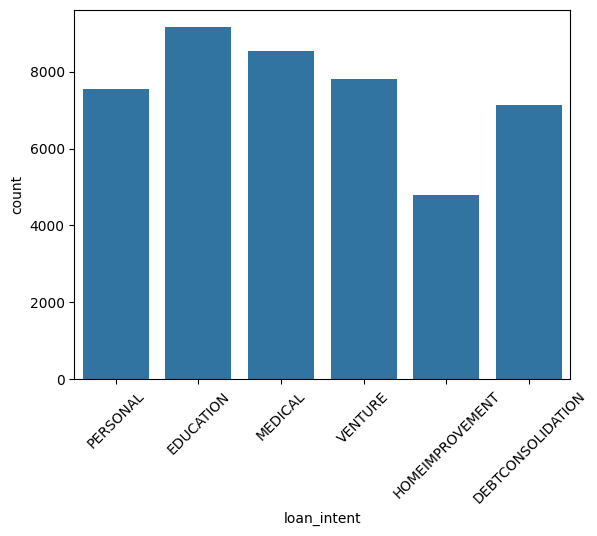

Number of unique values in previous_loan_defaults_on_file: 2

Unique values in previous_loan_defaults_on_file: ['No' 'Yes']



,proportion
previous_loan_defaults_on_file,
Yes,0.507956
No,0.492044


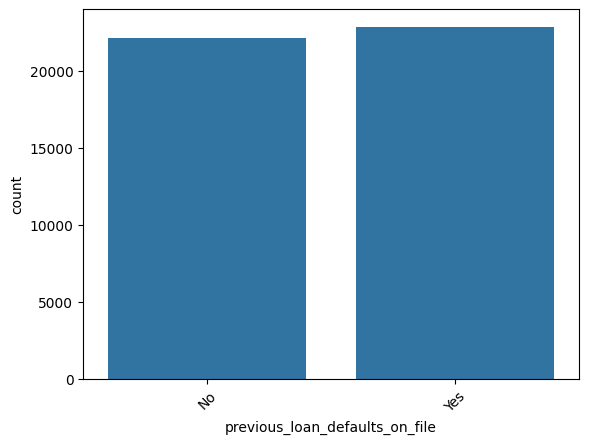

Number of unique values in loan_status: 2

Unique values in loan_status: [1 0]



,proportion
loan_status,
0,0.777778
1,0.222222


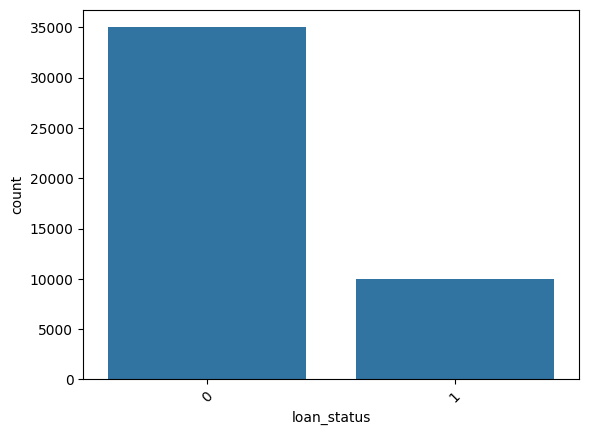

In [19]:
for col in cat_cols:
    plots_for_cat_cols(col)

# FE

In [21]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.7 MB/s eta 0:00:00


In [22]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split

In [23]:
df.columns[-1]

'loan_status'

In [24]:
# make X and y

X, y = df.drop(columns=["loan_status"]), df['loan_status']

In [25]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2,
                                                    random_state=42, stratify=y,
                                                    shuffle=True)

print("shape of training data is ", X_train.shape)
print("shape of test data is ", X_test.shape)

shape of training data is  (36000, 13)
shape of test data is  (9000, 13)


In [26]:
num_cols

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'credit_score']

In [27]:
cat_cols.pop(-1)

'loan_status'

In [28]:
cat_cols

['person_gender',
 'person_education',
 'person_home_ownership',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
# pipeline for numerical column
# 1. Outlier Capping
# 2. Scaling --> Robust Scaler

num_pipe = Pipeline(steps=[
    ("outlier", Winsorizer(capping_method="iqr", tail="both", fold=1.5)),
    ("scaling", RobustScaler())
])

num_pipe

Pipeline(steps=[('outlier',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
                ('scaling', RobustScaler())])

In [31]:
cat_cols.pop(1)

'person_education'

In [32]:
ohe_cols = cat_cols

In [33]:
order_of_education = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

In [34]:
# transformer object
# 1. OHE
# 2. Num pipe
# 3. Ordinal encode --> education

preprocessor = ColumnTransformer(transformers=[
    ("num_pipe", num_pipe, num_cols),
    ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), ohe_cols),
    ("ordinal", OrdinalEncoder(categories=[order_of_education], handle_unknown="use_encoded_value",
                               unknown_value=-1), ["person_education"])
], remainder="passthrough", n_jobs=-1, verbose_feature_names_out=False)

preprocessor


ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_pipe',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaling', RobustScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_exp', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length',
                                  'credit_score']),
                                ('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['person_gender', 'person_home_ownership',
                                  'loan_intent',
                                  'previous_loan_defaults_on_file']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High School',
                                                             'Associate',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctorate']],
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['person_education'])],
                  verbose_feature_names_out=False)

In [35]:
X_train = preprocessor.fit_transform(X_train)

X_test = preprocessor.transform(X_test)

In [36]:
# feature names

feature_names = preprocessor.get_feature_names_out()

feature_names

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [37]:
feature_names.shape

(19,)

In [38]:
X_train

array([[-0.33333333, -0.16634333, -0.28571429, ...,  1.        ,
         1.        ,  3.        ],
       [-0.5       , -0.43195902, -0.28571429, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5       ,  2.09432555,  0.42857143, ...,  1.        ,
         1.        ,  3.        ],
       ...,
       [ 0.66666667,  0.11619795,  0.71428571, ...,  0.        ,
         1.        ,  2.        ],
       [ 0.66666667, -0.55913519,  0.57142857, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16666667, -0.36995962,  0.14285714, ...,  0.        ,
         0.        ,  3.        ]])

# Model Building

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

**Build the Dataset**

In [40]:
y_train.values

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
# create a Dataset class

class LoanDataset(Dataset):

    def __init__(self, X, y):
        self.X = torch.from_numpy(X).to(torch.float32)
        self.y = torch.from_numpy(y.values).to(torch.float)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        row, label = self.X[idx], self.y[idx]
        return row, label

In [42]:
temp_dataset = LoanDataset(X_train[:10],y_train.iloc[:10])

temp_dataset


In [43]:
len(temp_dataset)

10

In [44]:
temp_dataset[0]

(tensor([-0.3333, -0.1663, -0.2857, -0.4976, -1.1325, -0.4167,  0.0000,  0.2353,
          1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  1.0000,  3.0000]),
 tensor(0.))

In [45]:
X_train[0], y_train.iloc[0]

(array([-0.33333333, -0.16634333, -0.28571429, -0.4975812 , -1.13254371,
        -0.41666667,  0.        ,  0.23529412,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  3.        ]),
 np.int64(0))

In [46]:
# define the datasets

train_dataset = LoanDataset(X_train, y_train)
test_dataset = LoanDataset(X_test, y_test)

In [47]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [48]:
for batch_features, batch_label in train_dataloader:
    print(batch_features)
    print(batch_features.shape)
    print(batch_label)
    print(batch_label.shape)

    break


tensor([[ 0.3333, -0.3151,  0.0000, -0.3455, -0.2549, -0.0833,  0.4000, -0.5147,
          0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  2.0000],
        [-0.1667,  0.1812, -0.2857,  0.2764, -0.4670,  0.0833, -0.4000,  0.0147,
          0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  0.0000],
        [ 0.6667,  1.3388,  0.5714, -0.6082, -0.0677, -0.7500,  0.8000,  0.7500,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  2.0000],
        [ 0.8333, -0.2633,  0.8571,  0.5529,  1.2747,  0.8333,  0.6000, -0.0147,
          1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  1.0000],
        [-0.5000,  0.9796, -0.5714, -0.4180, -1.0874, -0.6667,  0.0000, -0.5735,
          0.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  1.0000,  3.0000],
     

**Model Arch**

In [49]:
# create the model

class MyModel(nn.Module):

    def __init__(self, num_features):
        super().__init__()

        self.network = nn.Sequential(
            nn.Linear(num_features, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, X):
        predictions = self.network(X)
        return predictions

In [50]:
# define the model

model = MyModel(num_features=X_train.shape[1])

In [51]:
model

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [52]:
# set the epochs and lr

epochs = 30
lr = 0.001


In [53]:
from torch.optim import Adam

In [54]:
# set the optimizer
optimizer = Adam(params=model.parameters(), lr=lr)

In [55]:
# set our loss function

loss_fn = nn.BCELoss()

In [56]:
len(train_dataloader)


1125

In [57]:
for batch_features_train, batch_labels_train in train_dataloader:
    print("Input: ", batch_features_train.shape)
    # forward pass
    y_pred_train = model(batch_features_train)
    print("Predictions: ", y_pred_train.shape)
    print(y_pred_train[0:3])
    print("Labels: ", batch_labels_train.unsqueeze(1).shape)

    break

Input:  torch.Size([32, 19])
Predictions:  torch.Size([32, 1])
tensor([[0.3693],
        [0.5223],
        [0.4093]], grad_fn=<SliceBackward0>)
Labels:  torch.Size([32, 1])


In [58]:
# training loop

train_batches = len(train_dataloader)
test_batches = len(test_dataloader)

# iterate over all the epochs
for epoch in range(1, epochs+1):
    train_loss = 0
    test_loss = 0

    # iterate over the batches of training data
    for batch_features_train, batch_labels_train in train_dataloader:

        # forward pass
        y_pred_train = model(batch_features_train)

        # calculate the loss
        batch_loss_train = loss_fn(y_pred_train, batch_labels_train.unsqueeze(1))

        # clear the gradients
        optimizer.zero_grad()

        # calculate the gradients using backprop
        batch_loss_train.backward()

        # update the model parameters
        optimizer.step()

        # add batch loss to epoch loss
        train_loss += batch_loss_train.item()

    # iterate over the batches of test data
    for batch_features_test, batch_labels_test in test_dataloader:
        with torch.no_grad():
            # forward pass
            y_pred_test = model(batch_features_test)

            # calculate the loss
            batch_loss_test = loss_fn(y_pred_test, batch_labels_test.unsqueeze(1))

            # add batch loss to epoch loss
            test_loss += batch_loss_test.item()

    avg_train_loss = train_loss / train_batches
    avg_test_loss = test_loss / test_batches

    print(f"Epoch: {epoch}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}")

Epoch: 1, Train Loss: 0.22765319135453965, Test Loss: 0.20154081258579348
Epoch: 2, Train Loss: 0.19814027923676703, Test Loss: 0.19686404140071667
Epoch: 3, Train Loss: 0.1928929210636351, Test Loss: 0.19258427527462338
Epoch: 4, Train Loss: 0.19197749676307044, Test Loss: 0.19371769587832985
Epoch: 5, Train Loss: 0.1895763906174236, Test Loss: 0.19359571830177982
Epoch: 6, Train Loss: 0.1867760607070393, Test Loss: 0.18920077154980908
Epoch: 7, Train Loss: 0.18568758520483972, Test Loss: 0.19537481880938332
Epoch: 8, Train Loss: 0.18508132370975283, Test Loss: 0.18950223346762624
Epoch: 9, Train Loss: 0.1814294662657711, Test Loss: 0.18993363868947147
Epoch: 10, Train Loss: 0.18334200521806876, Test Loss: 0.1897158154174157
Epoch: 11, Train Loss: 0.18206890905896822, Test Loss: 0.18615118008608936
Epoch: 12, Train Loss: 0.18029608450664414, Test Loss: 0.18676281538098416
Epoch: 13, Train Loss: 0.17935314191381135, Test Loss: 0.1878669210412401
Epoch: 14, Train Loss: 0.178345721993181

In [59]:
from sklearn.metrics import classification_report

In [60]:
# model to be set to eval mode

model.eval()

MyModel(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=64, bias=True)
    (7): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=1, bias=True)
    (10): Sigmoid()
  )
)

In [61]:
# define the dataloader

train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size=32,
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=32,
                             shuffle=False)

In [62]:
# calculate the predictions on training data

train_predictions = []

for batch_features, batch_labels in train_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        train_predictions.extend(y_pred)


y_pred_train = np.array(train_predictions)

In [63]:
y_pred_train.shape, y_train.shape

((36000,), (36000,))

In [64]:
# calculate the predictions on test data

test_predictions = []

for batch_features, batch_labels in test_dataloader:
    with torch.no_grad():
        y_pred = model(batch_features).squeeze(1).numpy()
        y_pred = np.where(y_pred >= 0.5, 1, 0)
        test_predictions.extend(y_pred)


y_pred_test = np.array(test_predictions)

In [65]:
y_pred_test.shape, y_test.shape

((9000,), (9000,))

In [66]:
# classifictaion report for training data

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     28000
           1       0.89      0.81      0.85      8000

    accuracy                           0.94     36000
   macro avg       0.92      0.89      0.90     36000
weighted avg       0.94      0.94      0.94     36000



In [67]:
# classifictaion report for testdata

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7000
           1       0.85      0.77      0.81      2000

    accuracy                           0.92      9000
   macro avg       0.89      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



# SHAP

In [68]:
import shap

In [69]:
X_train.shape

(36000, 19)

In [70]:
X_test.shape

(9000, 19)

In [71]:
# manual random seed

np.random.seed(42)

In [72]:
# 500 index values --> random sampling

idx_values = np.random.choice(a=X_train.shape[0],size=500,replace=False)

In [73]:
# create the background data for our deep explainer

sample_training_data = X_train[idx_values,:]

background_data = torch.tensor(sample_training_data, dtype=torch.float32)

In [74]:
# shape of sample training data
background_data.shape


torch.Size([500, 19])

In [75]:
# create explainer to calculate the shap values
explainer = shap.DeepExplainer(model=model,
                               data=background_data)

In [76]:
# expected value

explainer.expected_value

array([0.2457762], dtype=float32)

In [77]:
# batch of test data

n_rows = 30

idx_values_batch = np.random.choice(a=X_test.shape[0],size=n_rows,replace=False)

X_test_batch = X_test[idx_values_batch,:]

In [78]:
X_test_batch.shape

(30, 19)

In [79]:
# create the batch data into tensor

X_test_batch = torch.tensor(X_test_batch, dtype=torch.float32)


In [80]:
# calculate the shap values

shap_values = explainer(X_test_batch)

In [81]:
# shape of shap values

shap_values.shape

(30, 19, 1)

In [82]:
type(shap_values)

shap._explanation.Explanation

In [83]:
base_value = explainer.expected_value

In [84]:
preprocessor.get_feature_names_out()

array(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score', 'person_gender_male',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes', 'person_education'],
      dtype=object)

In [85]:
# make changes to the explanation object

shap_values = shap.Explanation(
    values=shap_values.values,
    base_values=base_value,
    data=X_test_batch,
    feature_names=preprocessor.get_feature_names_out()
)

In [86]:
shap_values.base_values

array([0.2457762], dtype=float32)

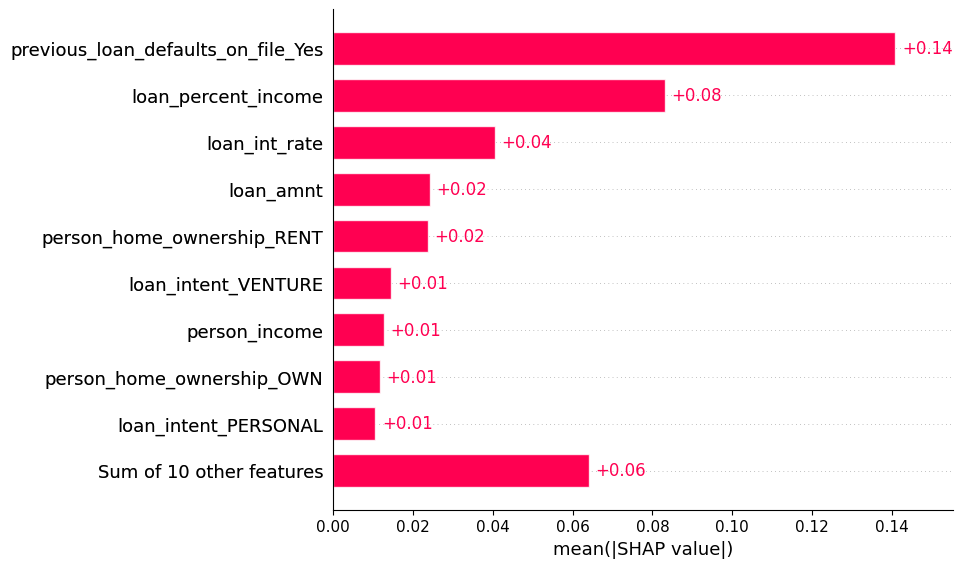

In [87]:
# bar plot

shap.plots.bar(shap_values[:,:,0])


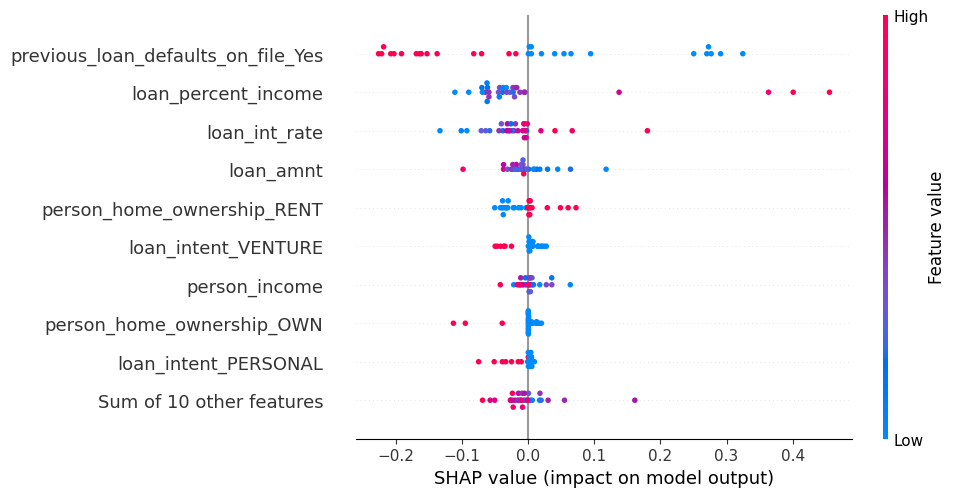

In [88]:
# summary plot

shap.plots.beeswarm(shap_values[:,:,0])

In [89]:
shap_values[0,:,0].shape

(19,)

# Local Plots

In [90]:
row_shap_value = shap_values[0,:,0]

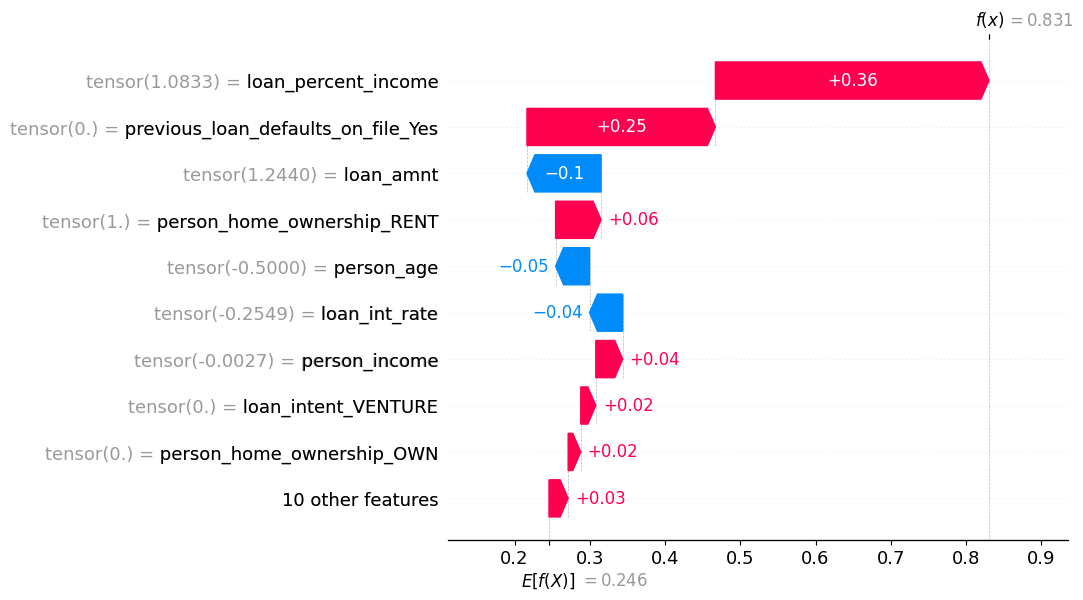

In [91]:
# waterfall plot

shap.plots.waterfall(row_shap_value)


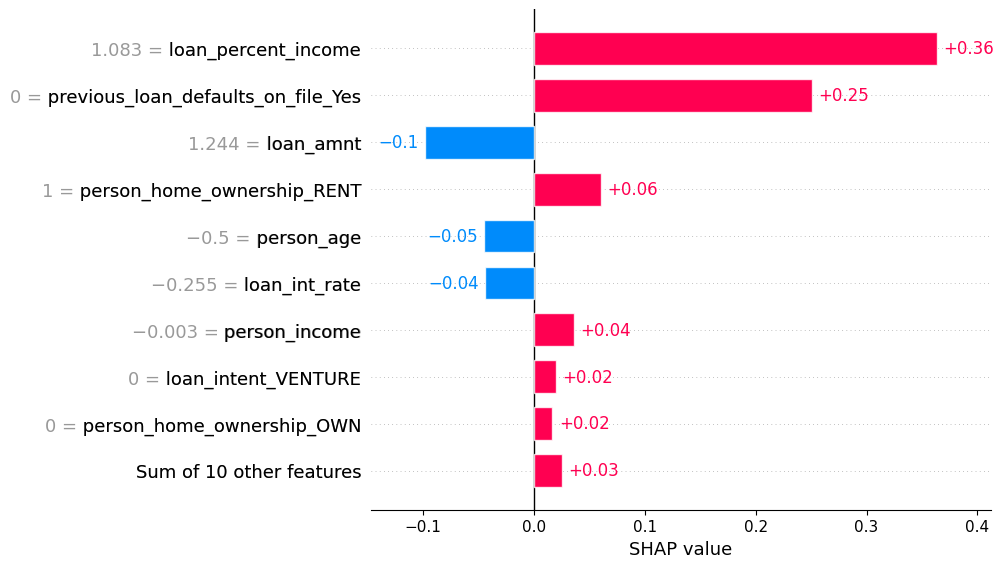

In [92]:
# bar plot
shap.plots.bar(row_shap_value)

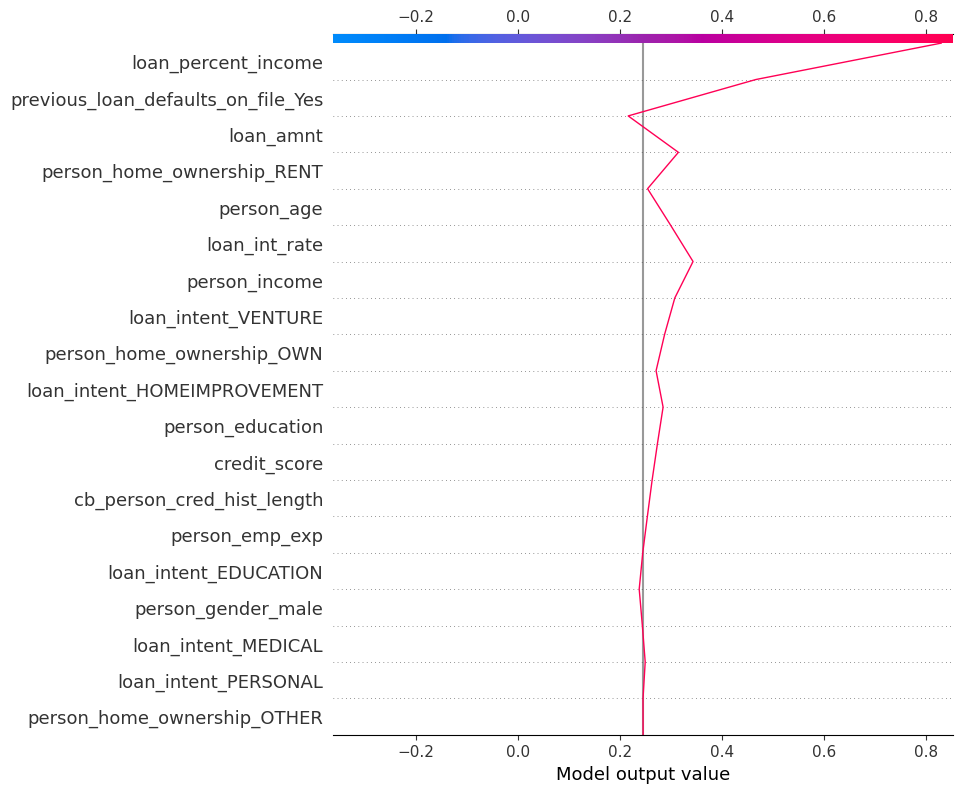

In [93]:
# decision plot

shap.plots.decision(shap_values=row_shap_value.values, base_value=base_value[0],
                    feature_names=feature_names)